# Dhruv Solanki

# Task 1: Prediction using Supervised ML

Task: Predict the percentage of an student based on the number of study hours using supervised ML.           
Also What will be predicted score if a student studies for 9.25 hrs/day ?

In [5]:
# Importing libraries required for the task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [6]:
df=pd.read_csv("/home/jovyan/binder/data.csv")

In [7]:
df.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.describe()

,Hours,Score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.corr()

,Hours,Score
Hours,1.000000,0.976191
Score,0.976191,1.000000


<AxesSubplot:>

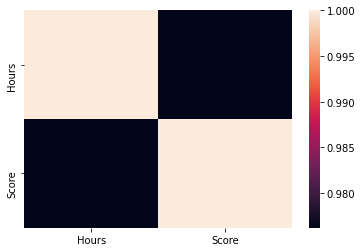

In [36]:
sns.heatmap(df.corr())

### Plotting our data points on 2D graph to eyeball the dataset.                                
We can create the plot with this script :

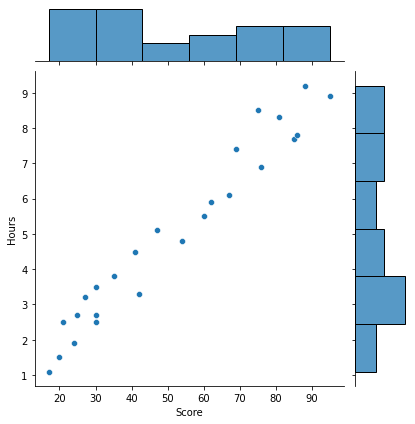

In [43]:
sns.jointplot(x='Score',y='Hours',data=df)

From the above graph, we can observe that there is a positive linear relation between the number of hours studied and percentage of score.

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

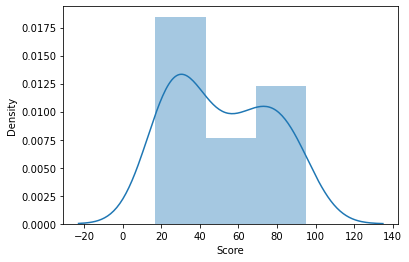

In [49]:
sns.distplot(df['Score'])

## Preparing the data
Dividing the data into attributes(inputs) and labels(outputs)

In [13]:
df.head()
x=df.iloc[:,:1].values
y=df.iloc[:,1].values

After dividing attributes and labels,we are spliting this data into training and testsets.        
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

## Training the Algorithm
After spliting the data into training and testsets, and we have to train our algorithm.

In [16]:
from sklearn.linear_model import LinearRegression
regre=LinearRegression()
regre.fit(x_train,y_train)

LinearRegression()

In [17]:
# Plotting the regression line
line =regre.coef_*x+regre.intercept_

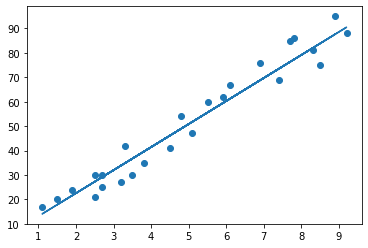

In [18]:
# Plotting for test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()


## Making Predictions
After having our algorithm trained, We are ready to make predictions.

In [19]:
y_pred=regre.predict(x_test)
y_pred

array([82.0000311 , 77.28033995, 51.79400776, 59.34551359, 87.66366048])

In [20]:
# Comparing Actual vs Predicted
compare_values=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
compare_values

,Actual,predicted
0,81,82.000031
1,86,77.280340
2,47,51.794008
3,62,59.345514
4,95,87.663660


## Evaluating the model
We have to check the performance of algorithm. This is particularly important to compare how well different algorithms perform on a particular dataset. For easy understanding, we have chosen the mean square error.

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.900904967324328


### Now we will predit what will be the score if a student studies for 9.25 hrs/ day :

In [30]:

hours=[[9.25]]
own_predict=regre.predict(hours)
print("score after studying for 9.25 hrs per day will be :",own_predict)

score after studying for 9.25 hrs per day will be : [90.96744428]
